<h1> Web Scraping from Network data (Developer Tools) <h1>

Main objectives:
- Get familiar with request, BeautifulSoup, and pandas library
- Know how to work with html tag, pagination, and strings
- Using basic pandas command (convert dict to dataframe, reset_index, split colums, drop column, replace, etc)


# **Using BeautifulSoup to web scraping Zillow data**




## Research Network data from Developer Tools

Fetch/XHR tab contains the private API calls in Zillow.com

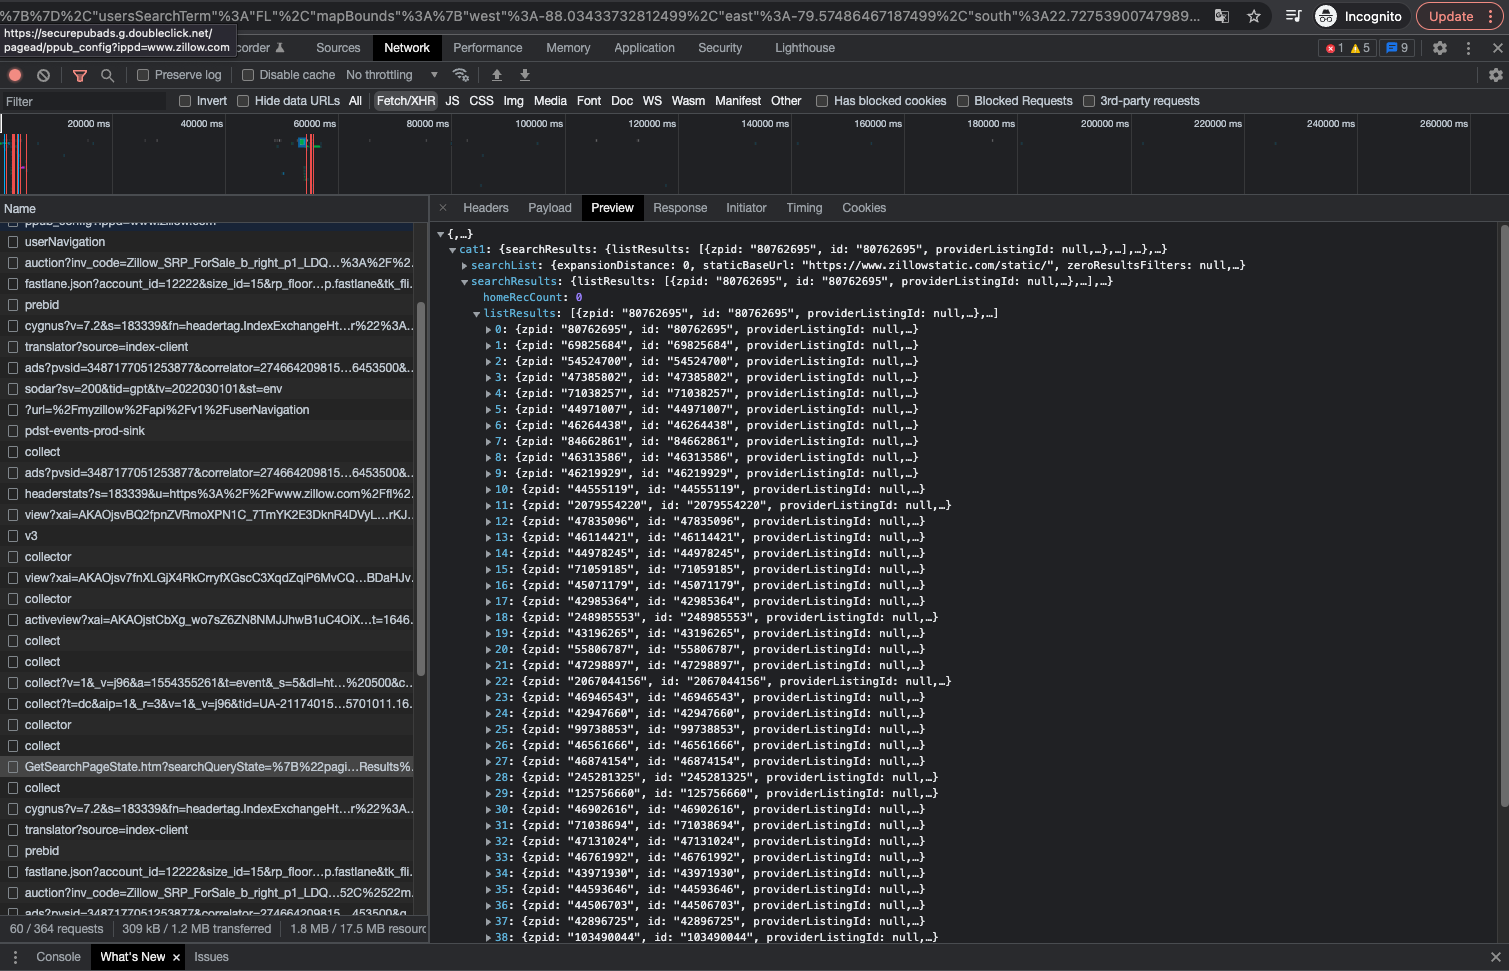

Copy as cURL and paste it to the website called curlconverter.com 

Convert it to Python requests

Include libraries and remove 'cookies'

Build a response list because data is in json format (loop for each page)

Pagination impacts the url link

In [ ]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import regex as re

pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment',None)

In [ ]:
import os
import requests

headers = {
    'authority': 'www.zillow.com',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="98", "Google Chrome";v="98"',
    'sec-ch-ua-mobile': '?0',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36',
    'sec-ch-ua-platform': '"macOS"',
    'accept': '*/*',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'accept-language': 'en-US,en;q=0.9'
}

params = (
    ('searchQueryState', '{"pagination":{},"usersSearchTerm":"FL","mapBounds":{"west":-88.03433732812499,"east":-79.57486467187499,"south":22.727539007479894,"north":32.54865486010418},"regionSelection":[{"regionId":14,"regionType":2}],"isMapVisible":false,"filterState":{"sortSelection":{"value":"globalrelevanceex"},"isAllHomes":{"value":true}},"isListVisible":true,"mapZoom":7}'),
    ('wants', '/{"cat1":/["listResults"/],"cat2":/["total"/]/}'),
    ('requestId', '3'),
)

response = requests.get('https://www.zillow.com/search/GetSearchPageState.htm', headers=headers, params=params)

# Note: original query string below. It seems impossible to parse and
# reproduce query strings 100% accurately so the one below is given
# in case the reproduced version is not "correct".
#response = requests.get('https://www.zillow.com/search/GetSearchPageState.htm?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22FL%22%2C%22mapBounds%22%3A%7B%22west%22%3A-88.03433732812499%2C%22east%22%3A-79.57486467187499%2C%22south%22%3A22.727539007479894%2C%22north%22%3A32.54865486010418%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A14%2C%22regionType%22%3A2%7D%5D%2C%22isMapVisible%22%3Afalse%2C%22filterState%22%3A%7B%22sortSelection%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22isAllHomes%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A7%7D&wants=\{%22cat1%22:\[%22listResults%22\],%22cat2%22:\[%22total%22\]\}&requestId=3', headers=headers)

In [ ]:
response.text

'<!-- This page outputs JSON instead of anything written here. -->'

https://www.zillow.com/fort-lauderdale-fl/3_p/?searchQueryState=%7B%22usersSearchTerm%22%3A%22Fort%20Lauderdale%2C%20FL%22%2C%22mapBounds%22%3A%7B%22west%22%3A-80.25718705639648%2C%22east%22%3A-80.0336839436035%2C%22south%22%3A26.068489681402614%2C%22north%22%3A26.224280120907125%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A31606%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A13%2C%22pagination%22%3A%7B%22currentPage%22%3A3%7D%7D

In [ ]:
with requests.session() as s:
  # Create a list of url link from page 1-10
  page_list = list(range(1,11))
  url_list = []
  #np.arange(1, 11, 1).tolist()
  url = 'https://www.zillow.com/homes/for_sale/fort-lauderdale/{}_p/'
  for page in page_list:
    link = url.format(page)
    url_list.append(link)

  # Get Response 200
  request = ''
  request_list = []
  
  for url in url_list:
      request = s.get(url, headers=headers)
      request_list.append(request)
  # Using BeautifulSoup
  soup = ''
  soup_list = []

  # Loop thru request list to get content
  for request in request_list:
    soup = BeautifulSoup(request.content, 'html.parser')
    soup_list.append(soup)




## Create dataframe from html tag

These are information we need from a property
- address
- price
- details (bed, bath, sqft)
- house type
- days on market


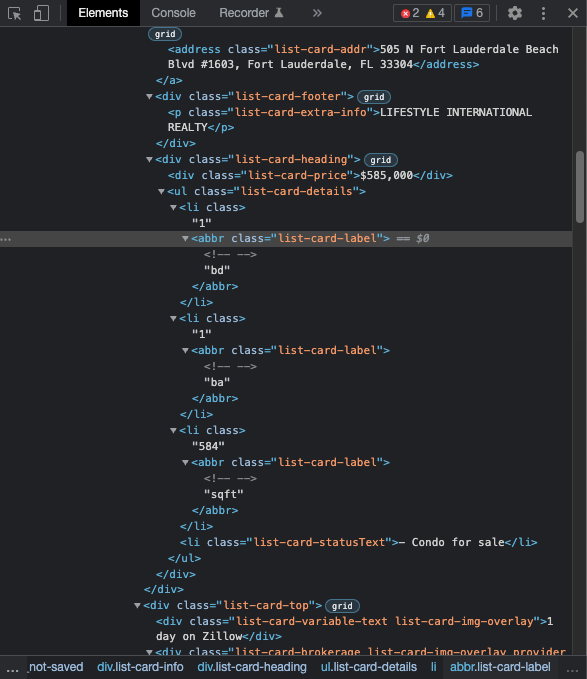

In [ ]:
soup_list[0].find_all (class_= 'list-card-addr')

[<address class="list-card-addr">6171 NW 33rd Way #6171, Fort Lauderdale, FL 33309</address>,
 <address class="list-card-addr">3421 SW 13th Ct, Fort Lauderdale, FL 33312</address>,
 <address class="list-card-addr">221 SW 31st Ave, Fort Lauderdale, FL 33312</address>,
 <address class="list-card-addr">2801 NW 24th St, Fort Lauderdale, FL 33311</address>,
 <address class="list-card-addr">1221 SW 18th St, Fort Lauderdale, FL 33315</address>,
 <address class="list-card-addr">1420 Cordova Rd APT 25C, Fort Lauderdale, FL 33316</address>,
 <address class="list-card-addr">113 SW 21st Way, Fort Lauderdale, FL 33312</address>,
 <address class="list-card-addr">1087 Wyoming Ave, Fort Lauderdale, FL 33312</address>,
 <address class="list-card-addr">2166 NE 56th St APT 203, Fort Lauderdale, FL 33308</address>]

In [ ]:
# Extract information from html (get text) and push to dataframe

address_list = []
price_list = []
details_list = []
last_update_list = []


for soup in soup_list:
  for i in soup:
    address = soup.find_all(class_='list-card-addr')
    price = soup.find_all(class_='list-card-price')
    details = soup.find_all(class_='list-card-details')
    last_update = soup.find_all(class_='list-card-variable-text list-card-img-overlay')
    # Add list of properties to the dataframe
   
 
  for i in address:
    address_list.append(i.text)
  for i in price:
    price_list.append(i.text)
  for i in details:
    details_list.append(i.text)
  for i in last_update:
    last_update_list.append(i.text)

property_dict = {
                  "address": address_list,
                 "price": price_list,
                 "details": details_list,
                 "last_update": last_update_list                 
}

# Create a dictionary 
df = pd.DataFrame.from_dict(property_dict)


In [ ]:
df

,address,price,details,last_update
0,"6171 NW 33rd Way #6171, Fort Lauderdale, FL 33309","$385,000","3 bds2 ba1,575 sqft- Townhouse for sale",3 days on Zillow
1,"3421 SW 13th Ct, Fort Lauderdale, FL 33312","$475,000","3 bds2 ba1,199 sqft- House for sale",8 days on Zillow
2,"221 SW 31st Ave, Fort Lauderdale, FL 33312","$485,000","4 bds2 ba1,920 sqft- House for sale",6 days on Zillow
3,"2801 NW 24th St, Fort Lauderdale, FL 33311","$349,000","3 bds2 ba1,404 sqft- House for sale",7 days on Zillow
4,"1221 SW 18th St, Fort Lauderdale, FL 33315","$995,000","4 bds3 ba2,651 sqft- House for sale",4 days on Zillow
5,"1420 Cordova Rd APT 25C, Fort Lauderdale, FL 3...","$189,000",1 bd1 ba600 sqft- Condo for sale,18 days on Zillow
6,"113 SW 21st Way, Fort Lauderdale, FL 33312","$345,000","3 bds1 ba1,310 sqft- House for sale",19 days on Zillow
7,"1087 Wyoming Ave, Fort Lauderdale, FL 33312","$350,000","3 bds2 ba1,540 sqft- House for sale",3 days on Zillow
8,"2166 NE 56th St APT 203, Fort Lauderdale, FL 3...","$214,000",2 bds2 ba830 sqft- Condo for sale,4 days on Zillow
9,"2670 E Sunrise Blvd #917, Fort Lauderdale, FL ...","$196,000",1 bd1 ba548 sqft- House for sale,11 days on Zillow


## Cleaning up data

In [ ]:
df.columns

Index(['address', 'price', 'details', 'last_update'], dtype='object')

In [ ]:
# Define the type to string to split
df['address'] = df['address'].astype('str')
df['price'] = df['price'].astype('str')
df['details'] = df['details'].astype('str')
df['last_update'] = df['last_update'].astype('str')

In [ ]:
# Drop row has invalid string "-- bds--""
df = df[df['details'].str.contains("--")==False]

In [ ]:
df = df.reset_index(drop=True)


In [ ]:
# Split details column into beds and type
df[['beds','type']] = df["details"].str.split("-",expand=True,n=1)
# Drop details column
df = df.drop(['details'], axis=1)
# Split beds column into bed and bath
df[['beds','baths']] = df["beds"].str.split("bd",expand=True,n=1) 
# Split baths column into bath and sqft
df[['baths','sqft']] = df['baths'].str.split("ba",expand=True,n=1) 
# Remove s from bath
df.loc[:,'baths'] = df.loc[:,'baths'].replace('s', ' ', regex=True)

In [ ]:
# Find duplicated
#df.duplicated()

In [ ]:
df

,address,price,last_update,beds,type,baths,sqft
0,"6171 NW 33rd Way #6171, Fort Lauderdale, FL 33309","$385,000",3 days on Zillow,3,Townhouse for sale,2,"1,575 sqft"
1,"3421 SW 13th Ct, Fort Lauderdale, FL 33312","$475,000",8 days on Zillow,3,House for sale,2,"1,199 sqft"
2,"221 SW 31st Ave, Fort Lauderdale, FL 33312","$485,000",6 days on Zillow,4,House for sale,2,"1,920 sqft"
3,"2801 NW 24th St, Fort Lauderdale, FL 33311","$349,000",7 days on Zillow,3,House for sale,2,"1,404 sqft"
4,"1221 SW 18th St, Fort Lauderdale, FL 33315","$995,000",4 days on Zillow,4,House for sale,3,"2,651 sqft"
5,"1420 Cordova Rd APT 25C, Fort Lauderdale, FL 3...","$189,000",18 days on Zillow,1,Condo for sale,1,600 sqft
6,"113 SW 21st Way, Fort Lauderdale, FL 33312","$345,000",19 days on Zillow,3,House for sale,1,"1,310 sqft"
7,"1087 Wyoming Ave, Fort Lauderdale, FL 33312","$350,000",3 days on Zillow,3,House for sale,2,"1,540 sqft"
8,"2166 NE 56th St APT 203, Fort Lauderdale, FL 3...","$214,000",4 days on Zillow,2,Condo for sale,2,830 sqft
9,"2670 E Sunrise Blvd #917, Fort Lauderdale, FL ...","$196,000",11 days on Zillow,1,House for sale,1,548 sqft
